In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
terrorist_df = pd.read_csv('./data/terrorism/globalterrorismdb.csv', encoding = "ISO-8859-1")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
terrorist_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [18]:
terrorist_df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
                       ...   
propextent            float64
propextent_txt         object
propvalue 

In [19]:
terrorist_df.shape

(181691, 135)

# 1. Sanity check 

In [20]:
terrorist_df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

# 2. Some descriptive analysis

Countries with the highes number of terrorist attacks

In [21]:
terrorist_df['country_txt'].value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country_txt, dtype: int64

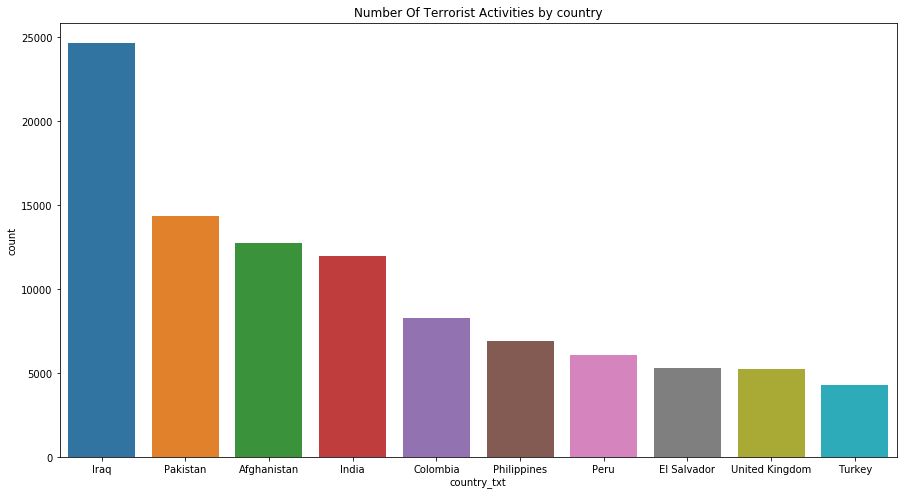

In [22]:
plt.subplots(figsize=(15,8))
sns.countplot('country_txt',
              data=terrorist_df, 
              order=pd.value_counts(terrorist_df['country_txt']).iloc[:10].index)
plt.title('Number Of Terrorist Activities by country')
plt.show()

Interesting that UK is ranked so high. I would expect UK to be a rather safe country. Let's explore UK in a more detail.

In [23]:
terror_uk = terrorist_df[terrorist_df.country_txt == 'United Kingdom']

In [24]:
terror_uk.shape

(5235, 135)

In [25]:
terror_uk.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
364,197006260001,1970,6,26,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN
365,197006270001,1970,6,27,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN
366,197006270002,1970,6,27,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN
367,197006270003,1970,6,27,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN
368,197006270004,1970,6,27,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0,0,1,1,NaN


In [26]:
terror_uk.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate            5219
extended                 0
resolution            5222
country                  0
country_txt              0
region                   0
region_txt               0
provstate                0
city                     0
latitude                 8
longitude                8
specificity              0
vicinity                 0
location              4253
summary               4022
crit1                    0
crit2                    0
crit3                    0
doubtterr                0
alternative           4232
alternative_txt       4232
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
                      ... 
propextent            4144
propextent_txt        4144
propvalue             4644
propcomment           4680
ishostkid                0
nhostkid              5153
n

Let's see the evolution of terrorist attacks in UK over time

Text(0.5, 1.0, 'Number of terrorist attacks and killings in UK over time')

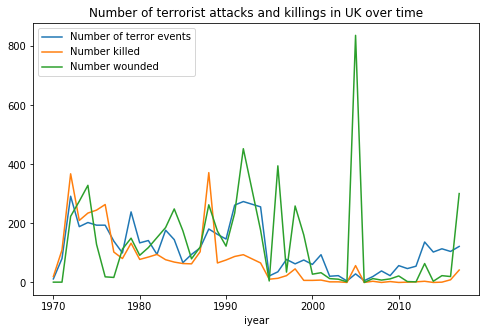

In [27]:
plt.figure(figsize=(8,5))
terror_uk.groupby('iyear')['eventid'].count().plot()
terror_uk.groupby('iyear')['nkill'].sum().plot()
terror_uk.groupby('iyear')['nwound'].sum().plot()
plt.legend(labels=['Number of terror events','Number killed', 'Number wounded'])
plt.title('Number of terrorist attacks and killings in UK over time')

Let's see the description and place of the most bloody attack in UK:

In [28]:
cols_of_interest = [
    'iyear',
    'provstate',
    'city',
    'nkill',
    'nwound',
    'attacktype1_txt',
    'summary',
    'scite1',
    'scite2'
]

In [29]:
terror_uk.loc[terror_uk.nkill.idxmax()][cols_of_interest]

iyear                           1988
provstate                   Scotland
city                       Lockerbie
nkill                            270
nwound                             0
attacktype1_txt    Bombing/Explosion
summary                          NaN
scite1                           NaN
scite2                           NaN
Name: 36669, dtype: object

Let's see top ten most up to date incidents in UK

In [30]:
terror_uk.sort_values(by='iyear', ascending=False)[:10][cols_of_interest]

,iyear,provstate,city,nkill,nwound,attacktype1_txt,summary,scite1,scite2
181664,2017,Northern Ireland,Belfast,0.0,2.0,Armed Assault,12/30/2017: Assailants attacked a house on Cav...,"""Four children terrified after witnessing 'bru...","""Police Appealing For Witnesses After Belfast ..."
173377,2017,Northern Ireland,Londonderry,0.0,1.0,Armed Assault,03/27/2017: Assailants shot and injured a civi...,"""Five days in Londonderry: one bomb attack and...","""Derry shooting victim had just served jail te..."
173494,2017,Northern Ireland,Londonderry,0.0,0.0,Bombing/Explosion,03/31/2017: An explosive device was discovered...,"""Pipe bomb found in Tamneymore Park, Londonder...","""Dissident threat to execute' Derry drug deale..."
174147,2017,Northern Ireland,Ballymena,0.0,0.0,Armed Assault,04/21/2017: Assailants threw an incendiary dev...,"""Family escapes injury in Ballymena petrol bom...","""Petrol bomb attack on house with 12-year-old ..."
174149,2017,Northern Ireland,Burnside,0.0,0.0,Facility/Infrastructure Attack,04/21/2017: An assailant threw an incendiary d...,"""Petrol bomb damages van,"" Sunday Life, April ...","""Petrol bomb used in attack on van in Ballycla..."
174158,2017,Northern Ireland,Belfast,0.0,0.0,Bombing/Explosion,"04/22/2017: An explosive device, believed to b...","""Dissidents left bomb at school as they feared...","""Bomb planted outside Belfast school intended ..."
174389,2017,Northern Ireland,Dundonald,0.0,0.0,Facility/Infrastructure Attack,05/01/2017: Assailants set fire to the St. Eli...,"""Police slam graveyard arson attack,"" Belfast ...",NaN
174731,2017,Northern Ireland,Belfast,0.0,1.0,Facility/Infrastructure Attack,05/14/2017: Assailants threw two petrol bombs ...,"""Two people arrested by PSNI investigating Eas...","""Woman suffers agonising burns in petrol bomb ..."
174893,2017,Northern Ireland,Craigavon,0.0,0.0,Bombing/Explosion,05/17/2017: Assailants threw an explosive devi...,"""Blast bomb incident appeal,"" Lurgan Mail, Jun...",NaN
174977,2017,Northern Ireland,Belfast,0.0,0.0,Facility/Infrastructure Attack,05/19/2017: Assailants threw two petrol bombs ...,"""Petrol bombs thrown at house in east Belfast,...","""East Belfast home targeted in petrol bomb att..."


So no one was killed in the top most up to date accidents. Let's see top ten where at least someone was killed. 

In [31]:
terror_uk[terror_uk.nkill > 0].sort_values(by='iyear', ascending=False)[:10][cols_of_interest]

,iyear,provstate,city,nkill,nwound,attacktype1_txt,summary,scite1,scite2
176088,2017,England,London,1.0,12.0,Unarmed Assault,06/19/2017: An assailant drove a van into Musl...,"""Finsbury Park attack: What we know so far,"" B...","""Man died of injuries in van attack on Muslims..."
175513,2017,England,London,11.0,48.0,Armed Assault,06/03/2017: Three assailants driving a van ran...,"""London attack: Who were the attackers?,"" BBC,...","""London attack: Men 'wanted to use 7.5 tonne l..."
175082,2017,England,Manchester,23.0,119.0,Bombing/Explosion,"05/22/2017: A suicide bomber, identified as Sa...","""Manchester attack: Extradition bid for Salman...","""Manchester Bomber Met With ISIS Unit in Libya..."
173192,2017,England,London,6.0,50.0,Armed Assault,03/22/2017: An assailant drove a vehicle into ...,"""Five dead and 40 injured in London attack,"" B...","""Westminster terror attacker Khalid Masood's f..."
172949,2017,Northern Ireland,Carrickfergus,1.0,0.0,Assassination,03/13/2017: Assailants opened fire on the vehi...,"""Attacks by paramilitaries reach eight-year hi...",NaN
160436,2016,Scotland,Glasgow,1.0,1.0,Armed Assault,03/24/2016: An assailant beat and stabbed a Mu...,"""Sectarian killer Tanveer Ahmed calls for enem...","""Scottish Muslim groups fail to attend Ahmadi ..."
157446,2016,Northern Ireland,Belfast,1.0,0.0,Armed Assault,01/07/2016: Assailants shot and killed a civil...,"""Conor McKee: North Belfast murder victim shot...","""PRIEST FACES DOWN HARDLINE BULLIES; DEFIANT R..."
159099,2016,England,Rochdale,1.0,0.0,Unarmed Assault,02/18/2016: Two assailants attacked Jalal Uddi...,"""IS attacked Britain - and nobody noticed,"" Mi...","""Jalal Uddin murder trial: Prosecution case co..."
159360,2016,Northern Ireland,Belfast,1.0,0.0,Armed Assault,02/25/2016: Assailants shot and killed a civil...,"""Dissidents blamed after man shot dead in Sout...","""Man (28) murdered in south Belfast on Thursda..."
159645,2016,Northern Ireland,Belfast,1.0,0.0,Bombing/Explosion,03/04/2016: An explosive device planted under ...,"""London - Easter terror warning in N.Ireland a...","""Murder probe after prison officer dies of bom..."


Lets check most common words in summary column of the terror events over 2010 - 2017 years in UK

In [32]:
terror_uk_texts = terror_uk[
    (terror_uk.iyear >= 2010) & 
    (terror_uk.iyear <= 2017) &
    (terror_uk.summary.notnull()) &
    (terror_uk.nkill > 0)
]

In [33]:
texts = ' '.join(str(txt) for txt in terror_uk_texts.summary)

(-0.5, 399.5, 199.5, -0.5)

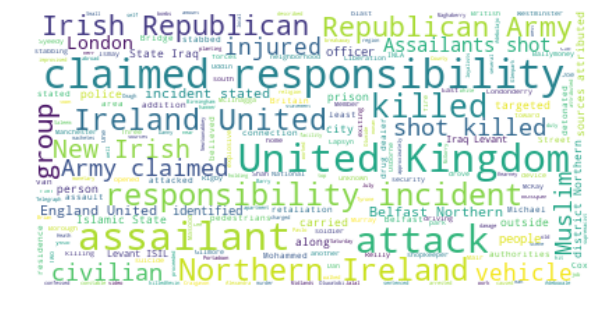

In [34]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(texts)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Let's get back to the whole dataset and check killings over the year in different regions

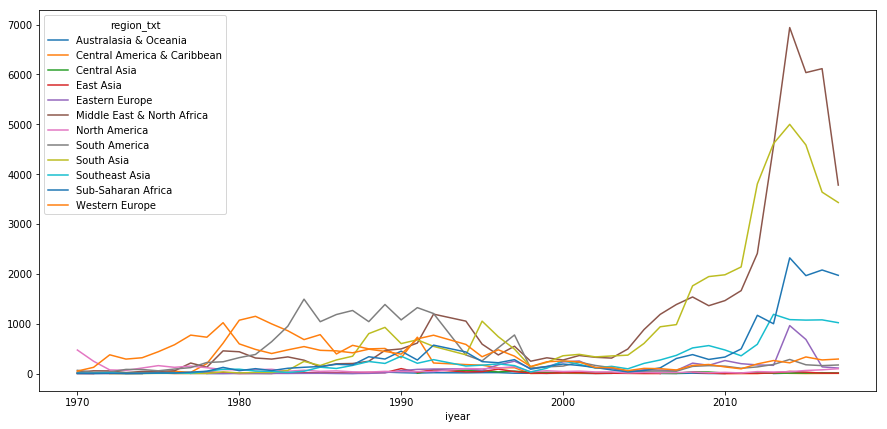

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
terrorist_df.groupby(['iyear', 'region_txt'])['eventid'].count().unstack().plot(ax=ax)

# Use R and ggplot

This is an example how to run R on Jupyter together with Python. and a nice treeplot taken from the https://www.kaggle.com/gpreda/global-terrorist-attacks

In [36]:
df_for_r = terrorist_df[[
    'iyear',
    'country_txt',
    'nkill',
    'nwound'
]]

In [37]:
%%R -i df_for_r
#install.packages("treemap", repos='http://cran.us.r-project.org', quiet=TRUE)

NULL


In [38]:
%%R
library(treemap)

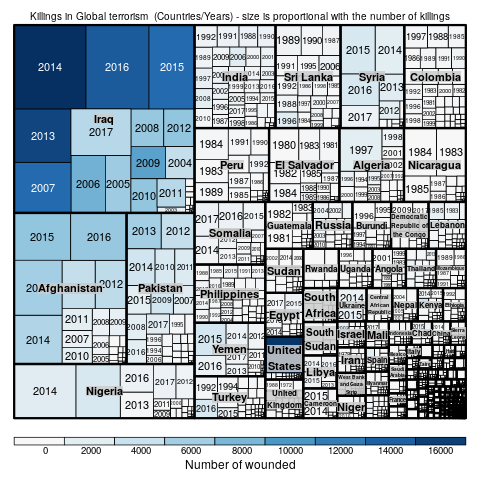

In [39]:
%%R
treemap(df_for_r,
        index=c("country_txt", "iyear"),  
        type = "value",
        vSize = "nkill", 
        vColor="nwound",
        palette = "RdBu", 
        title="Killings in Global terrorism  (Countries/Years) - size is proportional with the number of killings", 
        title.legend = "Number of wounded",
        fontsize.title = 10
)